In [65]:
# Exploration of 

In [66]:
# import

import pandas as pd


# Ingestion and Clean-up
<hr>

In [67]:
df = pd.read_csv('../data/EV-fuel/all_EV_stations.csv', low_memory=False)

In [68]:
df.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47559 entries, 0 to 47558
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    47559 non-null  object 
 1   Station Name                      47559 non-null  object 
 2   Street Address                    47559 non-null  object 
 3   Intersection Directions           2361 non-null   object 
 4   City                              47559 non-null  object 
 5   State                             47559 non-null  object 
 6   ZIP                               47559 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     44765 non-null  object 
 9   Status Code                       47559 non-null  object 
 10  Expected Date                     154 non-null    object 
 11  Groups With Access Code           47559 non-null  object 
 12  Acce

## Clean-up
<hr>

In [70]:
# Lists all the columns to DROP
columns_to_drop = ['Status Code','Plus4','Fuel Type Code','BD Blends','NG Fill Type Code','NG PSI','Hydrogen Status Link','NG Vehicle Class','E85 Blender Pump','Intersection Directions (French)','Access Days Time (French)','BD Blends (French)','Groups With Access Code (French)','Hydrogen Is Retail','CNG Dispenser Num','CNG On-Site Renewable Source','CNG Total Compression Capacity','CNG Storage Capacity','CNG Storage Capacity','LNG On-Site Renewable Source','E85 Other Ethanol Blends','EV Pricing (French)','LPG Nozzle Types','LPG Nozzle Types','Hydrogen Pressures','Hydrogen Standards','CNG Fill Type Code','CNG PSI','CNG Vehicle Class','LNG Vehicle Class','Restricted Access','LPG Primary']
# Drop Columns
df.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [96]:
# replace all EV level NAN with 0
df['EV Level1 EVSE Num'] = df['EV Level1 EVSE Num'].fillna(0)
df['EV Level2 EVSE Num'] = df['EV Level2 EVSE Num'].fillna(0)
df['EV DC Fast Count'] = df['EV DC Fast Count'].fillna(0)

In [72]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,47549,47550,47551,47552,47553,47554,47555,47556,47557,47558
Station Name,LADWP - Truesdale Center,LADWP - West LA District Office,Southern California Edison - Rosemead Office B...,Los Angeles Convention Center,LADWP - John Ferraro Building,LADWP - Haynes Power Plant,State Capitol Parking Garage,LADWP - Harbor Generating Station,LADWP - Sylmar West,LADWP - EV Service Center,...,The Towers at Bayside,"Century Springs Park, LLC",211 Perimeter Center,Parc at White Rock Garage,Cliftwood Charging Station,Temple Shopping Center,The James,Atlantico at Miramar,CORK FACTORY CORK 7,LAS CRUCES DOWNTOWN PLAZA
Street Address,11797 Truesdale St,1394 S Sepulveda Blvd,2244 Walnut Grove Ave,1201 S Figueroa St,111 N Hope St,6801 E 2nd St,1303 10th St,161 N Island Ave,13201 Sepulveda Blvd,1630 N Main St,...,8400 Sunset Boulevard,6100 Lake Forest Drive,211 Perimeter Center Pkwy,7545 E. Northwest Highway,185 Cliftwood Drive NE,3130 Colima Road,2303 Mid Lane,12121 Southwest 43rd Street,2350 Railroad St,101 E Organ Ave
Intersection Directions,NaN,NaN,NaN,West hall and South hall,Across Hope,NaN,At 12th and N St,At B St,NaN,NaN,...,NaN,NaN,NaN,The stations are located in the garage.,NaN,NaN,NaN,NaN,NaN,NaN
City,Sun Valley,Los Angeles,Rosemead,Los Angeles,Los Angeles,Long Beach,Sacramento,Wilmington,Sylmar,Los Angeles,...,Rowlett,Atlanta,Atlanta,Dallas,Sandy Springs,Hacienda Heights,Houston,Miramar,Pittsburgh,Las Cruces
State,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,TX,GA,GA,TX,GA,CA,TX,FL,PA,NM
ZIP,91352,90024,91770,90015,90012,90803,95814,90744,91342,90012,...,75088,30328,30346,75238,30328,91745,77027,33025,15222,88001
Station Phone,NaN,NaN,NaN,213-741-1151,NaN,NaN,NaN,NaN,NaN,NaN,...,800-663-5633,800-663-5633,800-663-5633,800-663-5633,800-663-5633,800-663-5633,800-663-5633,800-663-5633,888-758-4389,888-758-4389
Status Code,E,E,T,E,E,E,E,E,E,E,...,E,E,E,E,E,E,E,E,E,E
Expected Date,NaN,NaN,2021-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Groups With Access Code,Private,Private,TEMPORARILY UNAVAILABLE (Private),Public,Private,Private,Private - Government only,Private,Private - Government only,Private,...,Public,Public,Public,Public,Public,Public,Public,Public,Public,Public


# Where are the EV stations located?
<hr>

- stats have the most
- type of geographic area that have most
- $$ demographic
- traffic 
- population 


In [73]:
# top 10 zip codes with most EV charging 
df['ZIP'].value_counts().head(10)

94025    366
95054    257
92618    222
94080    171
92802    137
94607    128
94128    124
92101    123
95814    115
90802    113
Name: ZIP, dtype: int64

# EV Charging - Level 1, Level 2, DC Fast Charging
<hr>

In [105]:
df[df['EV Level1 EVSE Num'] > 0]['ZIP'].count()

1017

In [106]:
df[df['EV Level2 EVSE Num'] > 0]['ZIP'].count()

42662

In [107]:
df[df['EV DC Fast Count'] > 0]['ZIP'].count()

5509

In [98]:
df['EV Other Info'].unique()

array([nan,
       '1 LP Inductive  1 SP Inductive  1 Avcon Conductive  1 Other Conductive',
       '1 LP Inductive', '1 SP Inductive', '2 Conductive 240V',
       '3 SP Inductive', '1 SP Inductive  1 Tesla Conductive',
       '2 SP Inductive  1 Avcon Conductive  1 Tesla Conductive',
       '2 SP Inductive', '6 Conductive 120V/240V NEMA 14-50',
       '2 Tesla Conductive', '1 Tesla Conductive', '1 Conductive 120V',
       '7 Conductive 120V', '2 Conductive 120V  1 Conductive 240V'],
      dtype=object)

# EV Networks 
<hr>

- Do particular networks work the particular states
- Do particular networks work the particular areas
Do particular networks work the particular facility type
- Do particular networks work the particular EV Level

In [74]:
df['EV Network'].value_counts()

ChargePoint Network    25517
Non-Networked           8175
Tesla Destination       4436
SemaCharge Network      1744
Blink Network           1586
Tesla                   1118
Greenlots                974
EV Connect               883
eVgo Network             856
Volta                    831
Electrify America        684
FLO                      222
OpConnect                149
FCN                      116
POWERFLEX                 71
Webasto                   61
LIVINGSTON                47
AMPUP                     45
EVGATEWAY                 21
EVCS                       7
ZEFNET                     4
CHARGELAB                  4
FPLEV                      2
Name: EV Network, dtype: int64

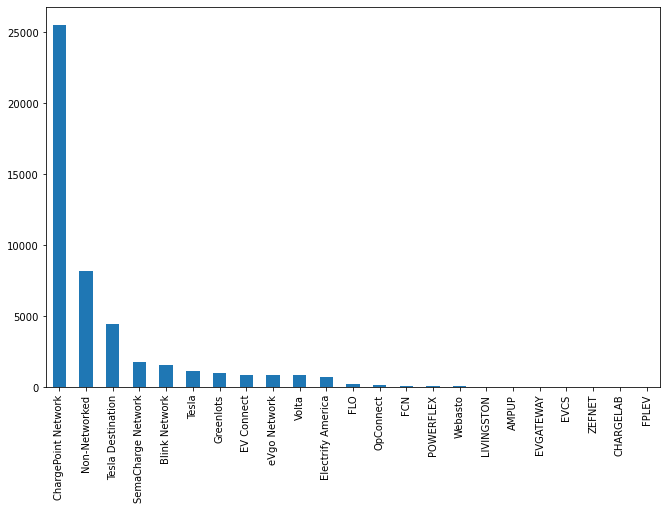

In [88]:
df['EV Network'].value_counts().plot(kind = 'bar', figsize = (11,7));

In [87]:
df['EV Network'].value_counts(normalize = True)

ChargePoint Network    0.536601
Non-Networked          0.171913
Tesla Destination      0.093285
SemaCharge Network     0.036675
Blink Network          0.033352
Tesla                  0.023511
Greenlots              0.020482
EV Connect             0.018569
eVgo Network           0.018001
Volta                  0.017475
Electrify America      0.014384
FLO                    0.004668
OpConnect              0.003133
FCN                    0.002439
POWERFLEX              0.001493
Webasto                0.001283
LIVINGSTON             0.000988
AMPUP                  0.000946
EVGATEWAY              0.000442
EVCS                   0.000147
ZEFNET                 0.000084
CHARGELAB              0.000084
FPLEV                  0.000042
Name: EV Network, dtype: float64

In [76]:
df['EV Network Web'].value_counts(normalize = True)

http://www.chargepoint.com/                         0.648001
https://www.tesla.com/destination-charging          0.112652
https://semaconnect.com/                            0.044289
http://www.blinkcharging.com/                       0.040276
http://www.teslamotors.com/supercharger             0.028391
http://greenlots.com/                               0.024735
http://evconnect.com/                               0.022424
https://www.evgo.com/                               0.021738
https://voltacharging.com/                          0.021103
https://www.electrifyamerica.com/                   0.017370
https://flo.ca/                                     0.005638
http://www.opconnect.com/                           0.003784
https://francis.energy                              0.002946
https://www.powerflex.com                           0.001803
https://www.evsolutions.com/ev-network              0.001549
https://www.solution.energy/evse/                   0.001194
https://ampup.io/       

In [77]:
df [df['EV Network'] == 'ChargePoint Network']

,Station Name,Street Address,Intersection Directions,City,State,ZIP,Station Phone,Status Code,Expected Date,Groups With Access Code,...,Federal Agency Name,Open Date,EV Connector Types,Country,Access Code,Access Detail Code,Federal Agency Code,Facility Type,EV Pricing,EV On-Site Renewable Source
134,METRO NASHVILLE FULTON GARAGE 1,800 2nd Avenue South,NaN,Nashville,TN,37210,888-758-4389,E,NaN,Public,...,NaN,2009-08-15,J1772,US,public,NaN,NaN,NaN,NaN,NaN
136,LINCOLN CITY TAFT DUAL 1,1226 SW 50th St,NaN,Lincoln City,OR,97367,888-758-4389,E,NaN,Public,...,NaN,2010-05-15,J1772,US,public,NaN,NaN,NaN,NaN,NaN
138,OUC RELIABLE 01,100 W Anderson Street,NaN,Orlando,FL,32801,888-758-4389,E,NaN,Public,...,NaN,2011-02-15,J1772,US,public,NaN,NaN,NaN,NaN,NaN
139,PUBLIC STATIONS WILLY ST EAST,1221 Williamson St,NaN,Madison,WI,53703,888-758-4389,E,NaN,Public,...,NaN,2009-08-15,J1772,US,public,NaN,NaN,NaN,NaN,NaN
142,LBCC LBCC DUAL 2,Ellingson Rd SW,NaN,Albany,OR,97321,888-758-4389,E,NaN,Public,...,NaN,2009-01-15,J1772,US,public,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47398,EV EXPERIENCE FAST CHARGE 2,145 W Brigham Rd,NaN,St. George,UT,84790,888-758-4389,E,NaN,Public,...,NaN,2021-09-04,CHADEMO J1772COMBO,US,public,NaN,NaN,NaN,NaN,NaN
47399,GEORGIA POWER BRUNSWICK DC2,2304 Glynn Ave,NaN,Brunswick,GA,31520,888-758-4389,E,NaN,Public,...,NaN,2021-09-04,CHADEMO J1772COMBO,US,public,NaN,NaN,NaN,NaN,NaN
47400,GEORGIA POWER BRUNSWICK DC1,2304 Glynn Ave,NaN,Brunswick,GA,31520,888-758-4389,E,NaN,Public,...,NaN,2021-09-04,CHADEMO J1772COMBO,US,public,NaN,NaN,NaN,NaN,NaN
47557,CORK FACTORY CORK 7,2350 Railroad St,NaN,Pittsburgh,PA,15222,888-758-4389,E,NaN,Public,...,NaN,2021-09-05,J1772,US,public,NaN,NaN,NaN,NaN,NaN


# EV Pricing 
<hr>

In [91]:
df['EV Pricing'].unique()

array([nan, 'Free', 'Pay to Park', '$7 per session',
       '$1 per hour for first two hours; $3 per hour thereafter',
       '$9 parking fee', '$25 per session', '$2 parking fee',
       '$0.75 per hour parking fee',
       '$1 per first and second half-hour parking fee; $1 per each additional hour parking fee',
       '$10 per session', 'Free for guests; $10 for non-guests',
       '$5 per hour', '$3 per session', '$6 per session',
       '$0.25 per hour parking fee', '$2 per hour', '$0.13 per kWh',
       '$1 per hour parking fee; Maximum session time of 2 hours',
       '$6 per charge', 'Variable parking fee', '$2 per session',
       '$2 for first hour, $1 per each hour thereafter',
       '$1 per half hour parking fee; maximum payment of $16',
       '$1 per half hour parking fee, Maximum payment of $16',
       '$2.00 per hour', '$15 per session', 'Free; Pay to park',
       '$2 per hour; Maximum session time of 4 hours',
       '$7 for EV and parking permit', '$5 parking fee', 

In [ ]:
# counts
<hr>